# **Context**
> The Play Store apps data has enormous potential to drive app-making businesses to
success. However, many apps are being developed every single day and only a few of
them become profitable. It is important for developers to be able to predict the
success of their app and incorporate features that make an app successful.
We can collect app data and user ratings from the app stores and use it to extract
insightful information.
A machine learning model can be used to predict a rating for a given app, which can
be used to estimate success and scope of improvement. Actionable insights learned
through such analysis can be used by developers to make a successful app and
capture the Android market.

# **Objective**
>	The goal of this project is to predict the rating of apps in the Google Play Store using machine learning techniques. The model will analyze various features such as app description, number of downloads and user reviews to make predictions about the app’s rating.

# **Attributes**

App: Application name
- Category: Category the app belongs to
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app
- Installs: Number of user downloads/installs for the app
- Type: Paid or Free
- Price: Price of the app
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For
eg, a musical family game will belong to Music, Game, Family genres.
- Last Updated: Date when the app was last updated on Play Store
- Current Ver: Current version of the app available on Play Store
- Android Ver: Min required Android version

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Portfolio /Datasets/Apps_data+(1) (1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The 'Rating' column has most null value and it our the dependent variable.

The best way to fill missing values might be using the median instead of mean.

In [8]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

Let's look at the apps in the data

In [9]:
df.App.value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [10]:
duplicateRows = df[df.duplicated(['App'])]

In [11]:
df.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [12]:
# Are there any duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 483


Let's check out the App categories

Now remove the catagories 1.9 which is irrelevant for our model

In [13]:
df.loc [ df ['Category'] == '1.9', 'Category'] = 'FAMILY'

Which category has the highest number of apps?

In [14]:
df.Category.value_counts()

FAMILY                 1973
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Family is the highest category.

Check the distribution of rating column and convert ratings into two categories and save it in the data frame as ‘Rating_cat’ ( high = +>3.5 and remaining as low)

In [15]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [16]:
x=df.Rating.mean()
df.Rating.fillna(x,inplace=True)
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [17]:
df=df.rename(columns={'Rating':'Rating_cat'})
Rating_cat=df.copy()

In [18]:
def rating_cat(row):

    if row >= 3.5:
        result = 'High'
    else:
        result = 'Low'

    return result

In [19]:
Rating_cat['Rating_cat'] = Rating_cat['Rating_cat'].apply(rating_cat)

In [20]:
df= Rating_cat.copy()
df.head()

,App,Category,Rating_cat,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,High,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,High,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,High,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,High,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,High,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Convert the ‘Review’ column to a numerical column and impute invalid values if there are any.

In [21]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [22]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [23]:
df.loc [ df['Reviews'] == '3.0M', 'Reviews'] = '0'

In [24]:
df["Reviews"] = pd.to_numeric(df["Reviews"])

Name the top 5 apps which have the highest number of reviews and their genre?

In [25]:
df.groupby("App").Reviews.sum().sort_values(ascending = False).head(5)

App
Instagram                                   266241989
WhatsApp Messenger                          207348304
Clash of Clans                              179558781
Messenger – Text and Video Chat for Free    169932272
Subway Surfers                              166331958
Name: Reviews, dtype: int64

Make the values of ‘Size’ as integers by replacing M and K with correct values. Convert all the values to numeric and make invalid values to NaN.

In [26]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [27]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [28]:
df["Size"] = [str(round(float(i.replace("k", ""))/1024, 3)) if "k" in i else i for i in df.Size]

In [29]:
df['Size'] = df['Size'].replace('1,000+', 0)

In [30]:
df["Size"] = df.Size.apply(lambda x: str(x).replace("M", "000"))

In [31]:
df["Size"] = df.Size.apply(lambda x: str(x).replace("k", ""))

In [32]:
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

Remove “,” and “+” from the values of the “Installs” column and change the datatype.

In [33]:
df['Installs'].value_counts()

0                 1695
1,000,000+        1303
100,000+          1054
10,000+           1011
1,000+             873
10,000,000+        825
100+               702
5,000,000+         535
500,000+           492
5,000+             461
50,000+            446
10+                376
500+               322
50+                201
100,000,000+       201
50,000,000+        147
5+                  78
1+                  64
500,000,000+        30
0+                  14
1,000,000,000+      10
Free                 1
Name: Installs, dtype: int64

In [34]:
df.loc [ df ['Installs'] == 'Free', 'Installs'] = '0'

In [35]:
# Converting installs from string to floating point
df["Installs"] = df.Installs.apply(lambda x: str(x).replace("+",""))
df["Installs"] = df.Installs.apply(lambda x: str(x).replace(",",""))
df["Installs"] = df.Installs.apply(lambda x: float(x))
df.Installs.dtype

dtype('float64')

What is the percentage of paid apps in the data? 

In [36]:
df['Type'].unique()

array(['Free', 0, 'Paid', '0'], dtype=object)

In [37]:
df['Type'].value_counts()

Free    8421
0       1695
Paid     724
0          1
Name: Type, dtype: int64

In [38]:
df.loc [ df ['Type'] == 0 , 'Type'] = 'Free'
df.loc [ df ['Type'] == '0' , 'Type'] = 'Free'

In [39]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


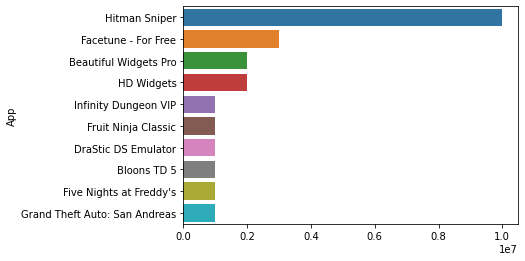

In [40]:
x=df[df["Type"]=="Paid"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


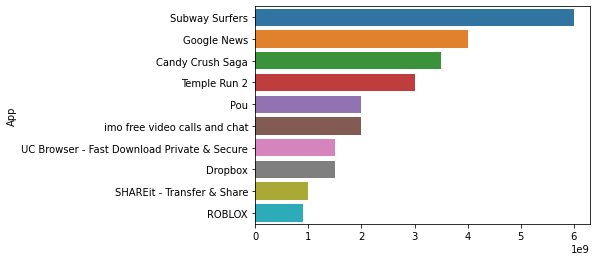

In [41]:
x=df[df["Type"]=="Free"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

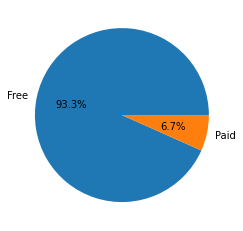

In [42]:
x=df.Type.value_counts()
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.1f%%")
plt.show()

Remove the "$” sign the “Price” column values and make it a numerical column.

In [43]:
df['Price'].unique()

array(['0', 0, '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99',
       '$5.99', '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70',
       '$2.00', '$3.88', '$25.99', '$399.99', '$17.99', '$400.00',
       '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99',
       '$1.96', '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28',
       '$4.60', '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56',
       '$30.99', '$3.61', '$394.99', '$1.26', 'Everyone', '$1.20',
       '$1.04'], dtype=object)

In [44]:
df.loc [ df ['Price'] == 'Everyone' , 'Price'] = '0'

In [45]:
df['Price'].unique()

array(['0', 0, '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99',
       '$5.99', '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70',
       '$2.00', '$3.88', '$25.99', '$399.99', '$17.99', '$400.00',
       '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99',
       '$1.96', '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28',
       '$4.60', '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56',
       '$30.99', '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'],
      dtype=object)

In [46]:
df["Price"] = df.Price.apply(lambda x: str(x).replace("$", ""))
df["Price"] = df.Price.apply(lambda x: float(x))
df.Price.dtype

dtype('float64')

Which is the most expensive app and how much does it cost?

In [47]:
x=df[df["Type"]=="Paid"]
y=x.groupby("App").Price.sum().sort_values(ascending=False).head(1)
print (y)

App
I'm Rich - Trump Edition    400.0
Name: Price, dtype: float64


I'm rich - Trump edtion is the most expensive app.

Drop columns that you feel can not be used for model building. Example- App, Content Rating, Genre, Last updated, Current Ver, and Android Vercolumns from the final data frame. 

In [48]:
# creating new variable for modeling
df_model = df.copy()

In [49]:
# droppping unnecessary columns
df_model.drop(['App', 'Content Rating', 
           'Genre', 'Last Updated', 
           'Current Ver', 'Android Ver'], 
          axis=1, inplace=True, errors='ignore')
df_model.columns

Index(['Category', 'Rating_cat', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Genres'],
      dtype='object')

In [50]:
df_model

,Category,Rating_cat,Reviews,Size,Installs,Type,Price,Genres
0,ART_AND_DESIGN,High,159,19000.0,10000.0,Free,0.0,Art & Design
1,ART_AND_DESIGN,High,967,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play
2,ART_AND_DESIGN,High,87510,8.7,5000000.0,Free,0.0,Art & Design
3,ART_AND_DESIGN,High,215644,25000.0,50000000.0,Free,0.0,Art & Design
4,ART_AND_DESIGN,High,967,2.8,100000.0,Free,0.0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...
10836,FAMILY,High,38,53000.0,5000.0,Free,0.0,Education
10837,FAMILY,High,4,3.6,100.0,Free,0.0,Education
10838,MEDICAL,High,3,9.5,1000.0,Free,0.0,Medical
10839,0,0,0,0.0,0.0,Free,0.0,0


In [51]:
df_model.loc [ df_model ['Rating_cat'] == 'High' , 'Rating_cat'] = '1'
df_model.loc [ df_model ['Rating_cat'] == 'Low' , 'Rating_cat'] = '0'

In [52]:
df_model

,Category,Rating_cat,Reviews,Size,Installs,Type,Price,Genres
0,ART_AND_DESIGN,1,159,19000.0,10000.0,Free,0.0,Art & Design
1,ART_AND_DESIGN,1,967,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play
2,ART_AND_DESIGN,1,87510,8.7,5000000.0,Free,0.0,Art & Design
3,ART_AND_DESIGN,1,215644,25000.0,50000000.0,Free,0.0,Art & Design
4,ART_AND_DESIGN,1,967,2.8,100000.0,Free,0.0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...
10836,FAMILY,1,38,53000.0,5000.0,Free,0.0,Education
10837,FAMILY,1,4,3.6,100.0,Free,0.0,Education
10838,MEDICAL,1,3,9.5,1000.0,Free,0.0,Medical
10839,0,0,0,0.0,0.0,Free,0.0,0


In [53]:
df_model["Rating_cat"] = df_model.Rating_cat.apply(lambda x: float(x))
df_model.Rating_cat.dtype

dtype('float64')

Encode categorical column (Type, Rating_categories, Category) [ Hint - use get_dummies]

In [54]:
df_model=pd.get_dummies(df_model,drop_first=True)

In [55]:
df_model.head(5)

,Rating_cat,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,1.0,159,19000.0,10000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,967,14000.0,500000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,87510,8.7,5000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,215644,25000.0,50000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,967,2.8,100000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define the dependent and independent 

In [56]:
x=df_model.iloc[:,1:]
y=df_model.iloc[:,:1]

Split the data into train and test set.

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=1)

In [58]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(x_train, y_train)

In [59]:
y_pred=regressor.predict(x_test)

In [60]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [61]:
summ=OLS( y_train,x_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Rating_cat   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              764.7
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                        0.00
Time:                        17:58:22   Log-Likelihood:                          58.082
No. Observations:                7588   AIC:                                      127.8
Df Residuals:                    7466   BIC:                                      973.8
Df Model:                         122                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                       2.208e-09   2.55e-09      0.867      0.386   -2.78e-09     7.2e-09
Size                                          4.265e-07   1.57e-07      2.713      0.007    1.18e-07    7.35e-07
Installs                                      1.298e-10    8.3e-11      1.564      0.118   -3.29e-11    2.92e-10
Price                                         8.687e-05      0.000      0.462      0.644      -0.000       0.000
Category_ART_AND_DESIGN                          0.8792      0.176      4.990      0.000       0.534       1.225
Category_AUTO_AND_VEHICLES                       0.4474      0.016     28.772      0.000       0.417       0.478
Category_BEAUTY                                  0.4783      0.024     20.134      0.000       0.432       0.525
Category_BOOKS_AND_REFERENCE                     0.4720      0.011     44.701      0.000       0.451       0.493
Category_BUSINESS                                0.4508      0.007     61.673      0.000       0.436       0.465
Category_COMICS                                  0.4189      0.021     19.556      0.000       0.377       0.461
Category_COMMUNICATION                           0.4552      0.009     51.750      0.000       0.438       0.472
Category_DATING                                  0.4153      0.010     41.354      0.000       0.396       0.435
Category_EDUCATION                               0.9249      0.037     25.250      0.000       0.853       0.997
Category_ENTERTAINMENT                           0.9755      0.039     24.926      0.000       0.899       1.052
Category_EVENTS                                  0.4975      0.017     28.732      0.000       0.464       0.531
Category_FAMILY                                  0.8763      0.021     41.256      0.000       0.835       0.918
Category_FINANCE                                 0.4519      0.009     52.436      0.000       0.435       0.469
Category_FOOD_AND_DRINK                          0.4744      0.014     33.031      0.000       0.446       0.503
Category_GAME                                    0.8906      0.033     27.393      0.000       0.827       0.954
Category_HEALTH_AND_FITNESS                      0.4452      0.009     48.460      0.000       0.427       0.463
Category_HOUSE_AND_HOME                          0.4567      0.017     26.382      0.000       0.423       0.491
Category_LIBRARIES_AND_DEMO                      0.4801      0.016     29.655      0.000       0.448       0.512
Category_LIFESTYLE                               0.6113      0.081      7.541      0.000       0.452       0.770
Category_MAPS_AND_NAVIGATION                  

# Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [64]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_test_pred = dt.predict(x_test)
y_train_pred = dt.predict(x_train)

In [65]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 0.9994909832833826
Test R2_score 0.3640669129072407


# Random Forest model

In [66]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

<ipython-input-66-6bf85a1b2f87>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [67]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 0.9509645824053872
Test R2_score 0.6487354476950892


# Gradient Boosting model

In [68]:
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, random_state = 10)

In [69]:
gbr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=10)

In [70]:
y_test_pred = gbr.predict(x_test)
y_train_pred = gbr.predict(x_train)

In [71]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 0.8045222043083265
Test R2_score 0.6660583794381536


## Check the importance of different features by using model.feature_importances_ function in Python

feature importance of decision tree

In [75]:
FI_dt = pd.DataFrame(dt.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_d = FI_dt.sort_values(by = 'Feature Importance', ascending = False)
print(FI_d)

                             Feature Importance
Size                                   0.760079
Reviews                                0.108535
Installs                               0.036709
Price                                  0.008223
Category_FAMILY                        0.003847
...                                         ...
Genres_Casual;Music & Video            0.000000
Genres_Casual;Education                0.000000
Genres_Casual;Creativity               0.000000
Genres_Casual;Brain Games              0.000000
Genres_Word                            0.000000

[155 rows x 1 columns]


 feature importance of random forest

In [74]:
FI_rf = pd.DataFrame(rf.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_r = FI_rf.sort_values(by = 'Feature Importance', ascending = False)
print(FI_r)

                                 Feature Importance
Size                                       0.761213
Reviews                                    0.115993
Installs                                   0.034224
Price                                      0.007484
Genres_Entertainment                       0.003512
...                                             ...
Genres_Educational;Pretend Play            0.000000
Genres_Education;Pretend Play              0.000000
Genres_Education;Creativity                0.000000
Genres_Education;Brain Games               0.000000
Genres_Word                                0.000000

[155 rows x 1 columns]


 feature importance of Gradient Boosting model

In [77]:
FI_gbr = pd.DataFrame(gbr.feature_importances_, columns = ['Feature Importance'], index = x_train.columns)
FI_r = FI_gbr.sort_values(by = 'Feature Importance', ascending = False)
print(FI_r)

                                    Feature Importance
Size                                          0.854423
Reviews                                       0.081580
Installs                                      0.021618
Price                                         0.005352
Category_TOOLS                                0.001589
...                                                ...
Genres_Puzzle;Creativity                      0.000000
Genres_Puzzle;Education                       0.000000
Genres_Racing                                 0.000000
Genres_Entertainment;Music & Video            0.000000
Genres_Word                                   0.000000

[155 rows x 1 columns]
